In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nba_api.stats.endpoints import cumestatsplayer
from nba_api.stats.endpoints import cumestatsplayergames
from nba_api.stats.static import players

{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True}
{'id': 203076, 'full_name': 'Anthony Davis', 'first_name': 'Anthony', 'last_name': 'Davis', 'is_active': True}
{'id': 201935, 'full_name': 'James Harden', 'first_name': 'James', 'last_name': 'Harden', 'is_active': True}
{'id': 203078, 'full_name': 'Bradley Beal', 'first_name': 'Bradley', 'last_name': 'Beal', 'is_active': True}
{'id': 201566, 'full_name': 'Russell Westbrook', 'first_name': 'Russell', 'last_name': 'Westbrook', 'is_active': True}
{'id': 1626164, 'full_name': 'Devin Booker', 'first_name': 'Devin', 'last_name': 'Booker', 'is_active': True}
{'id': 1629029, 'full_name': 'Luka Doncic', 'first_name': 'Luka', 'last_name': 'Doncic', 'is_active': True}
{'id': 203954, 'full_name': 'Joel Embiid', 'first_name': 'Joel', 'last_name': 'Embiid', 'is_active': True}
{'id': 201142, 'full_name': 'Kevin Durant', 'first_name': 'Kevin', 'last_name': 'Durant', 'is_active': True}
{'id': 2019

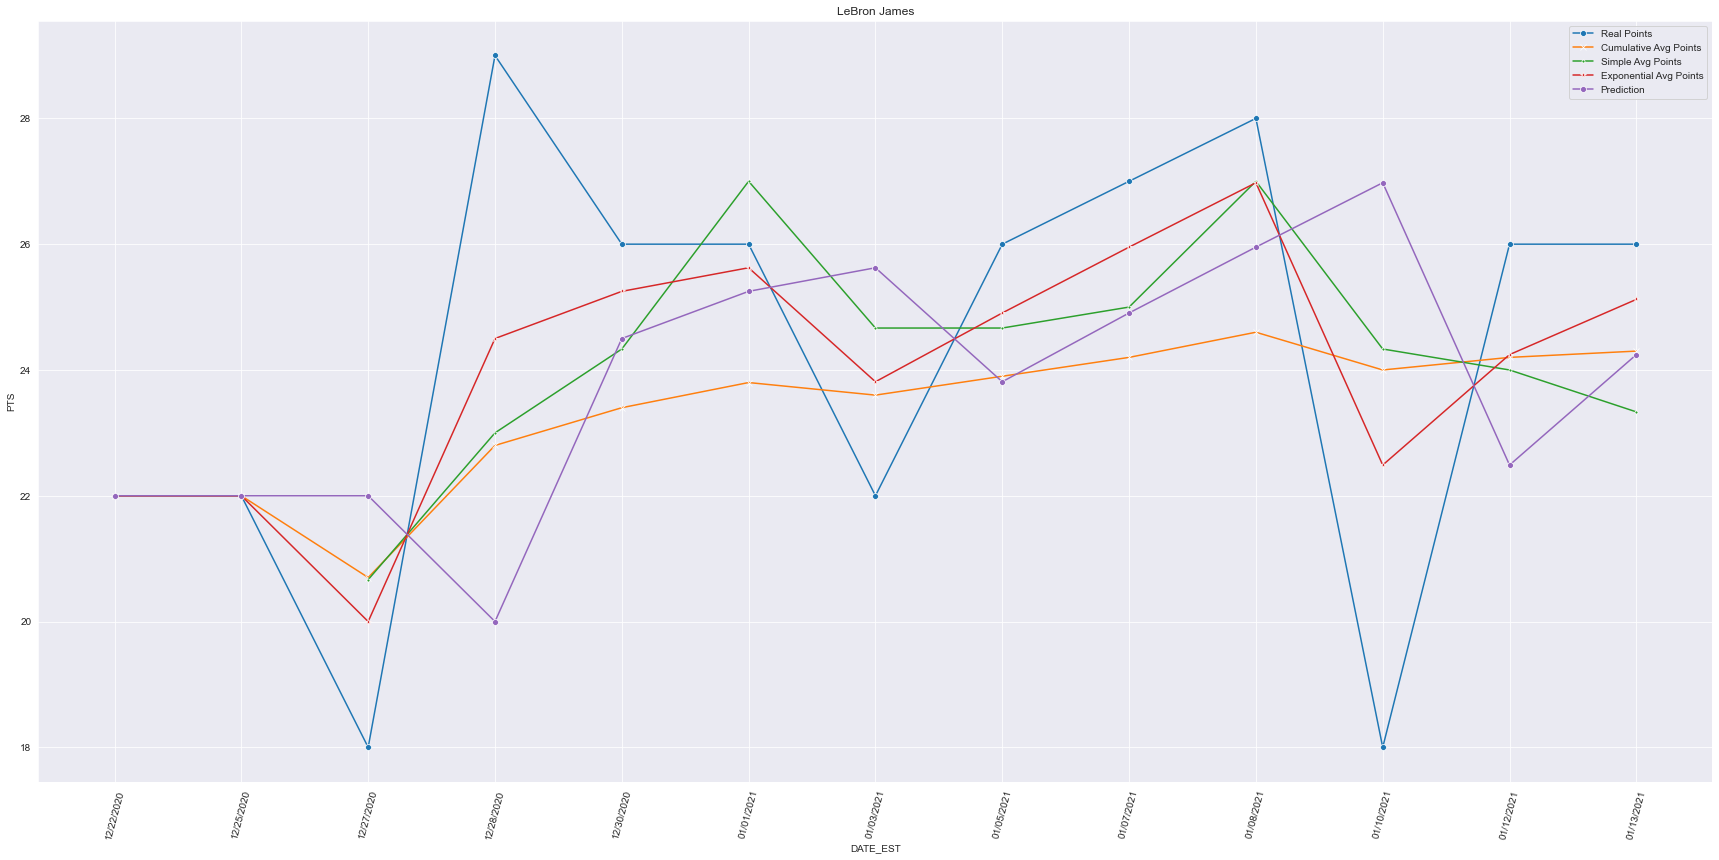

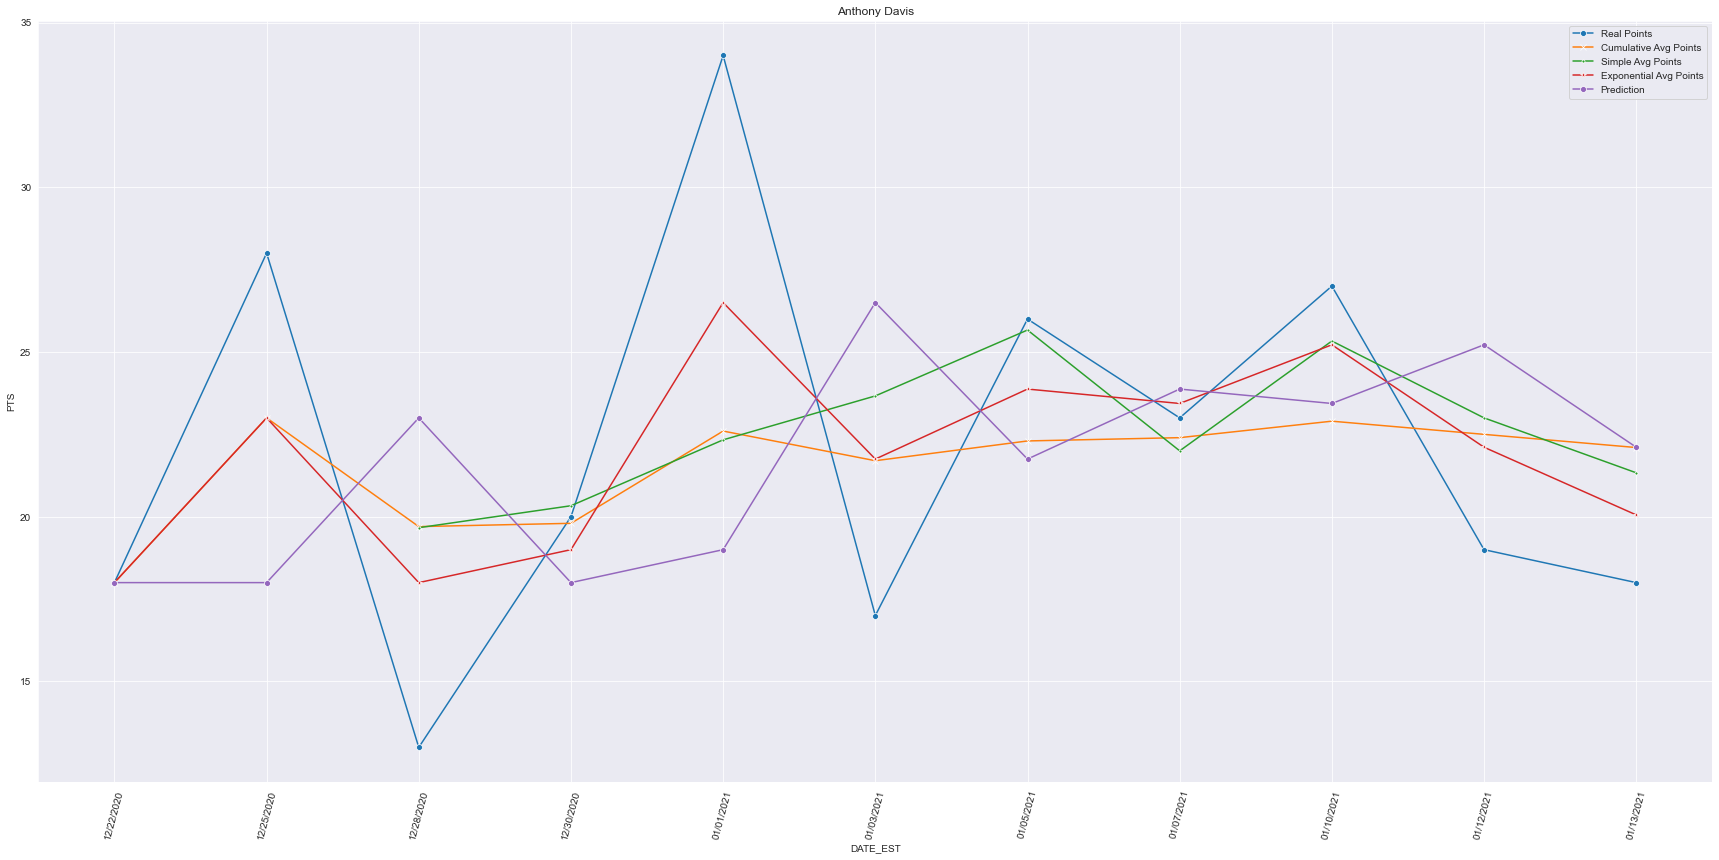

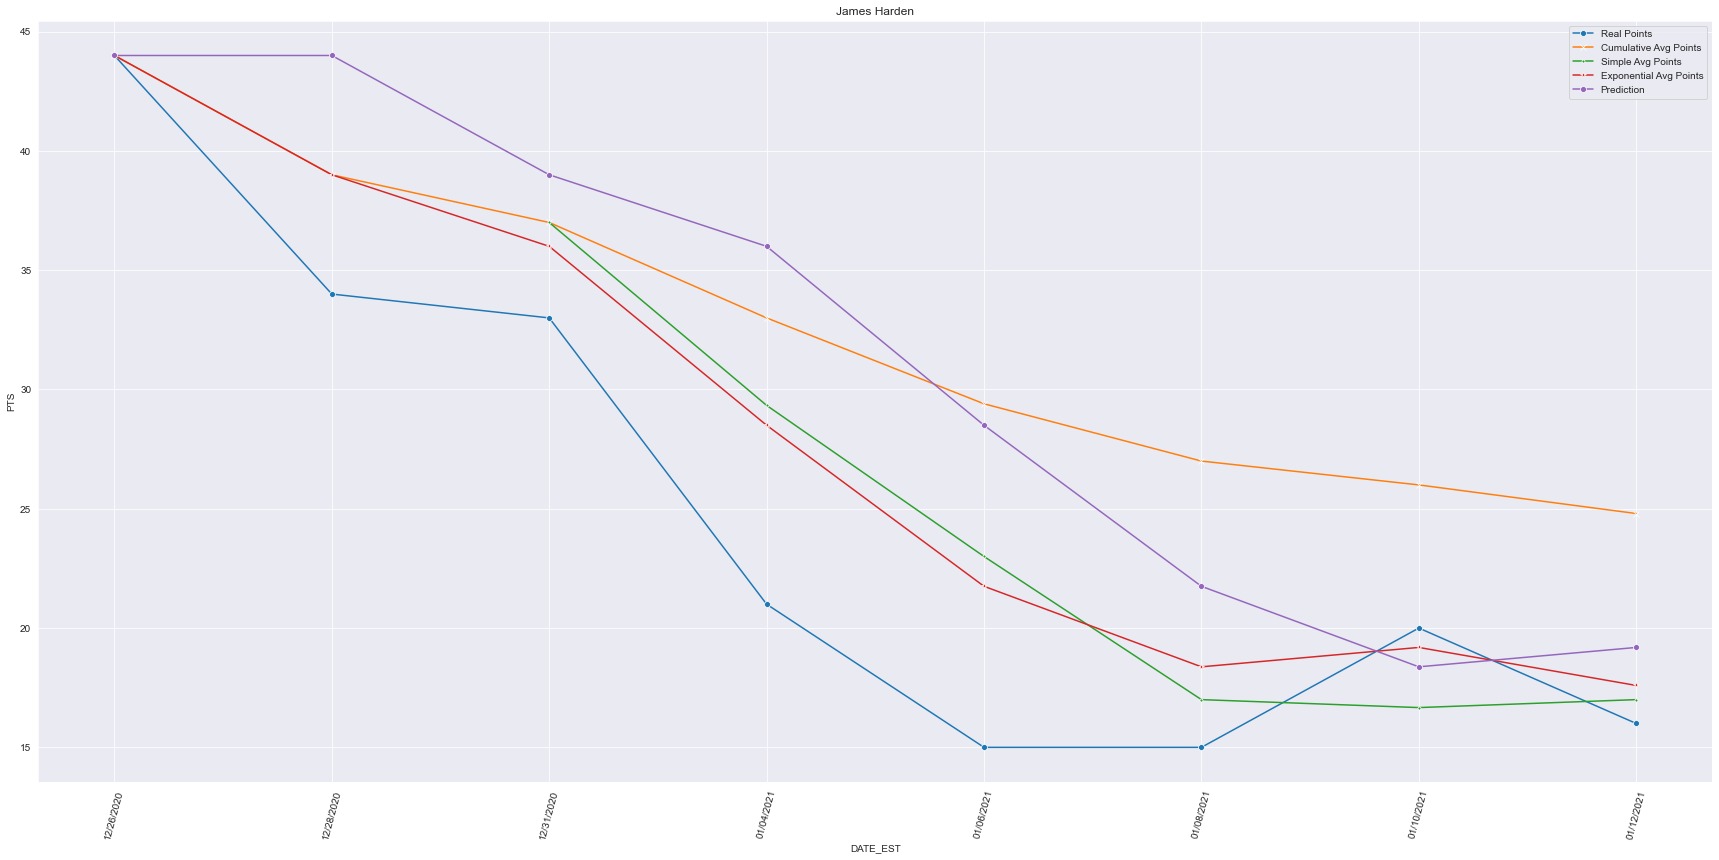

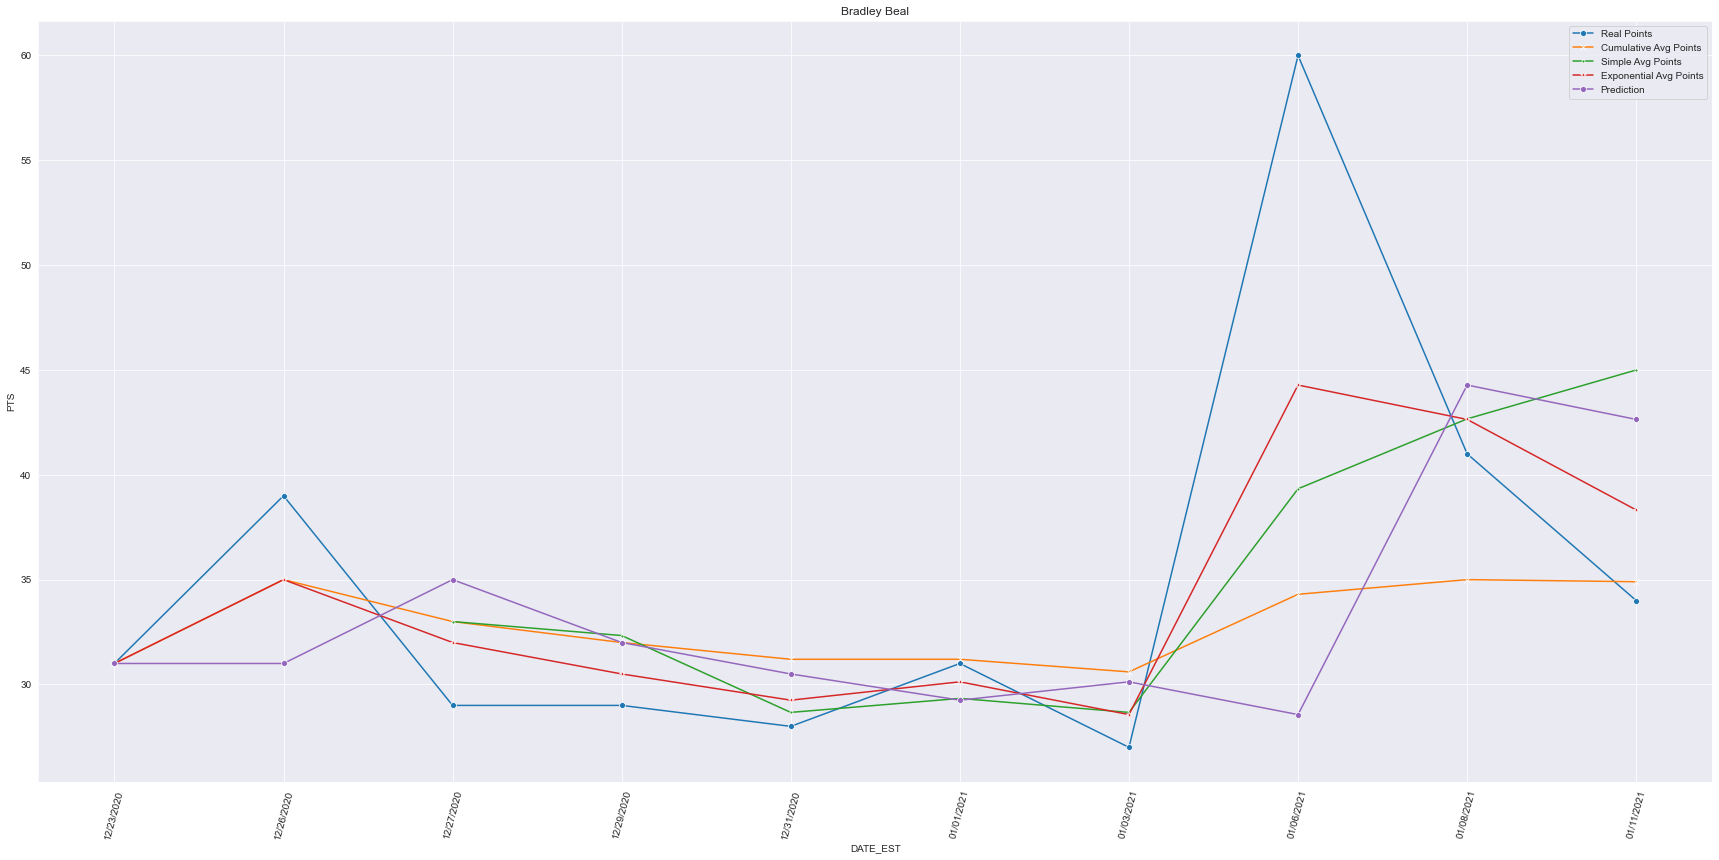

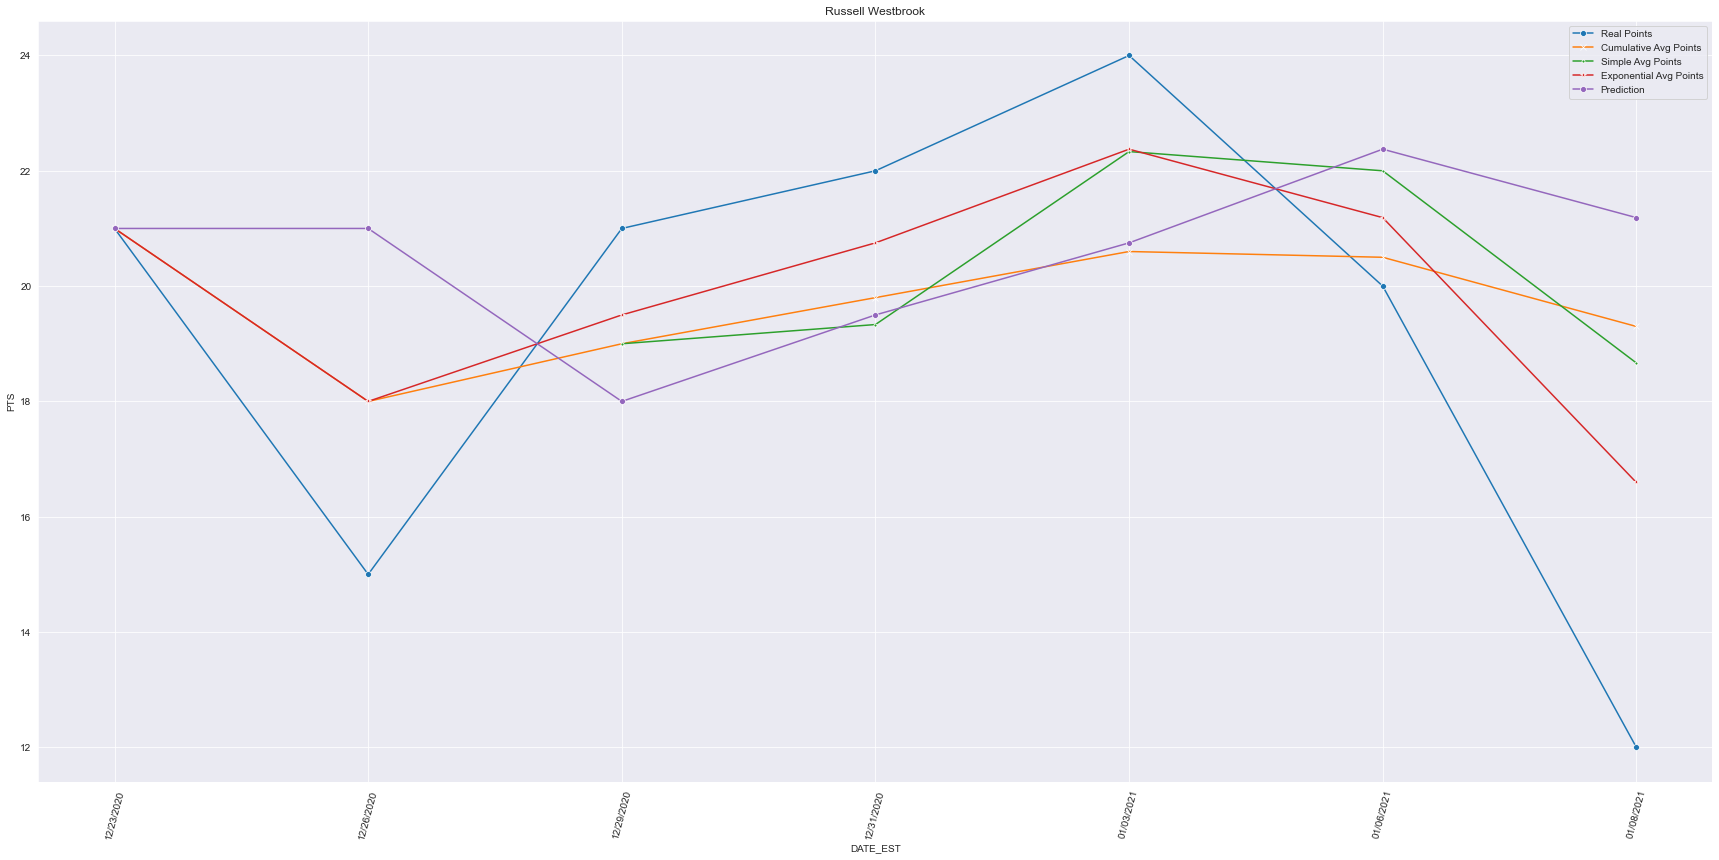

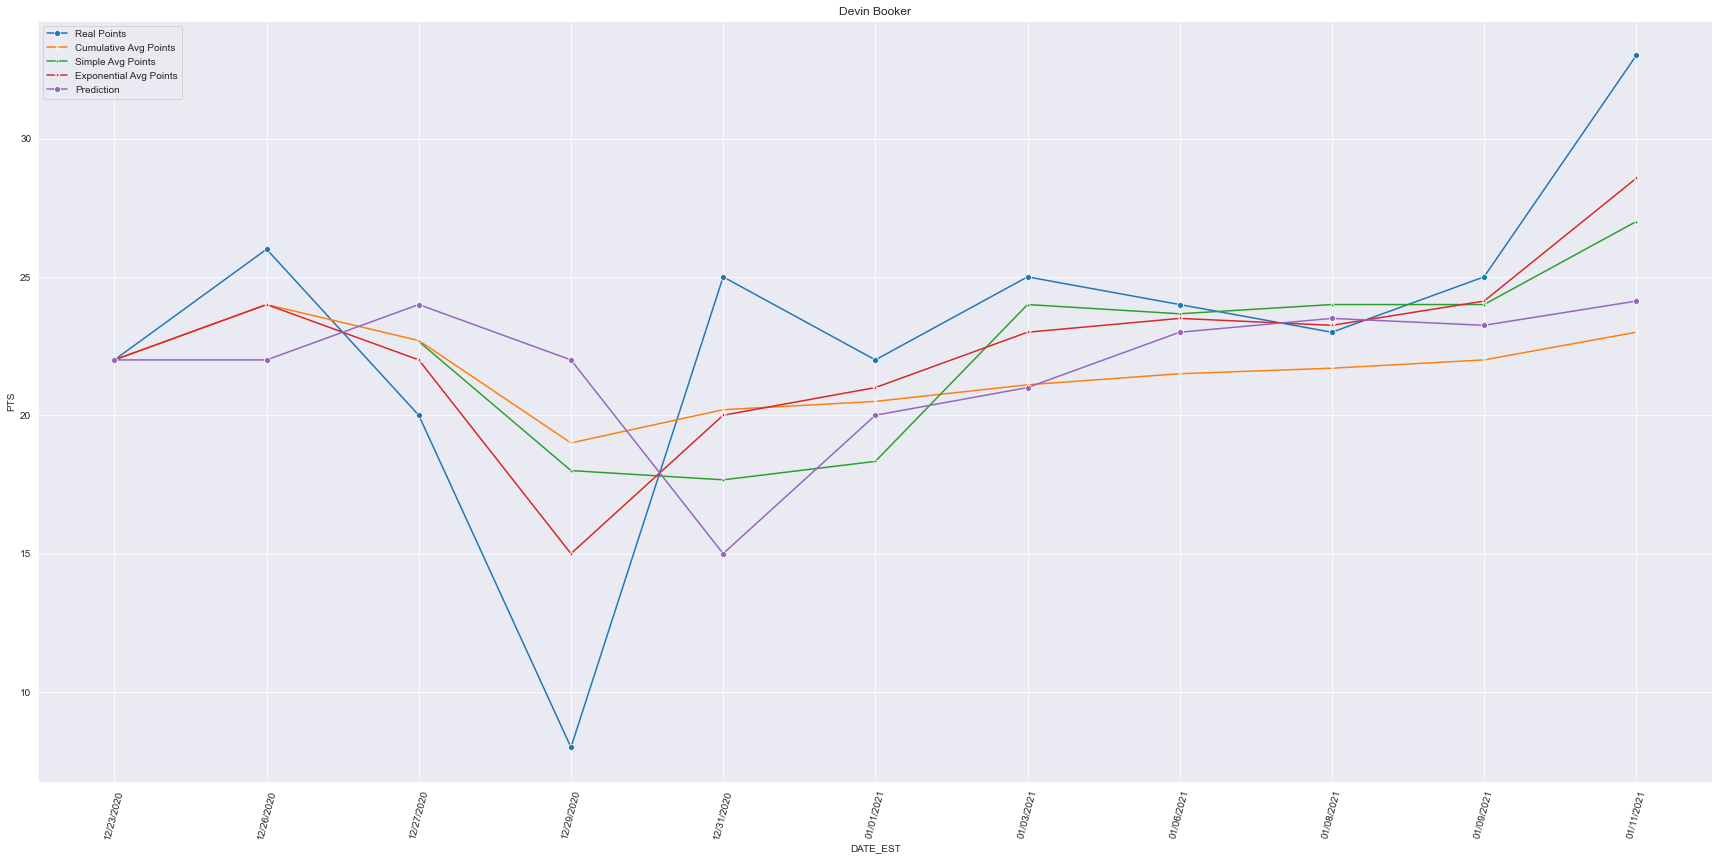

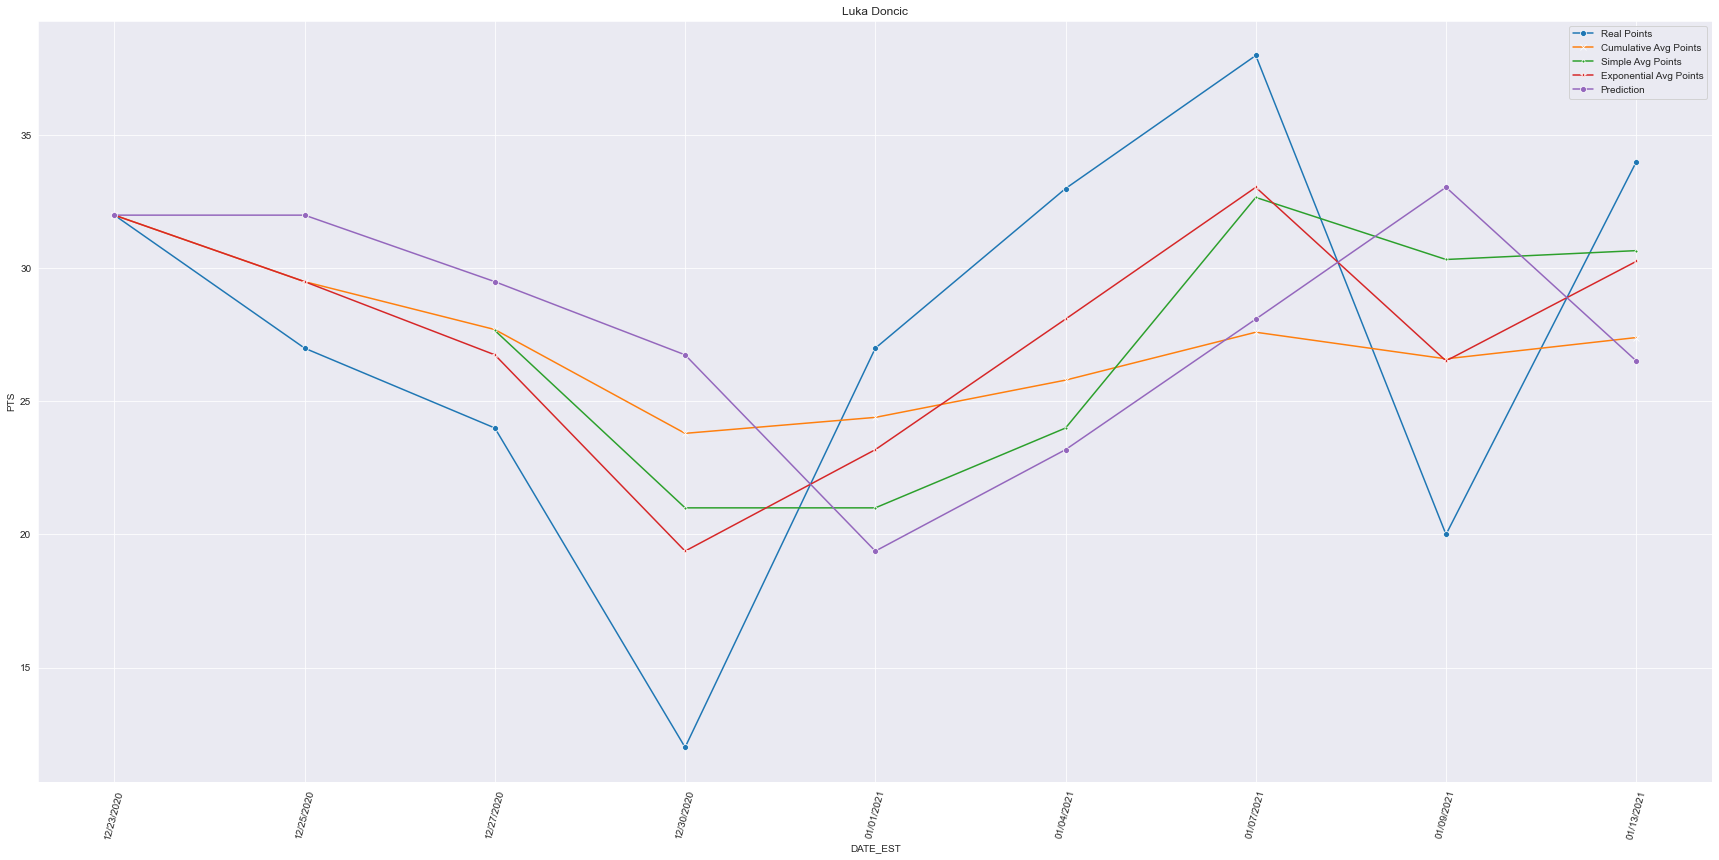

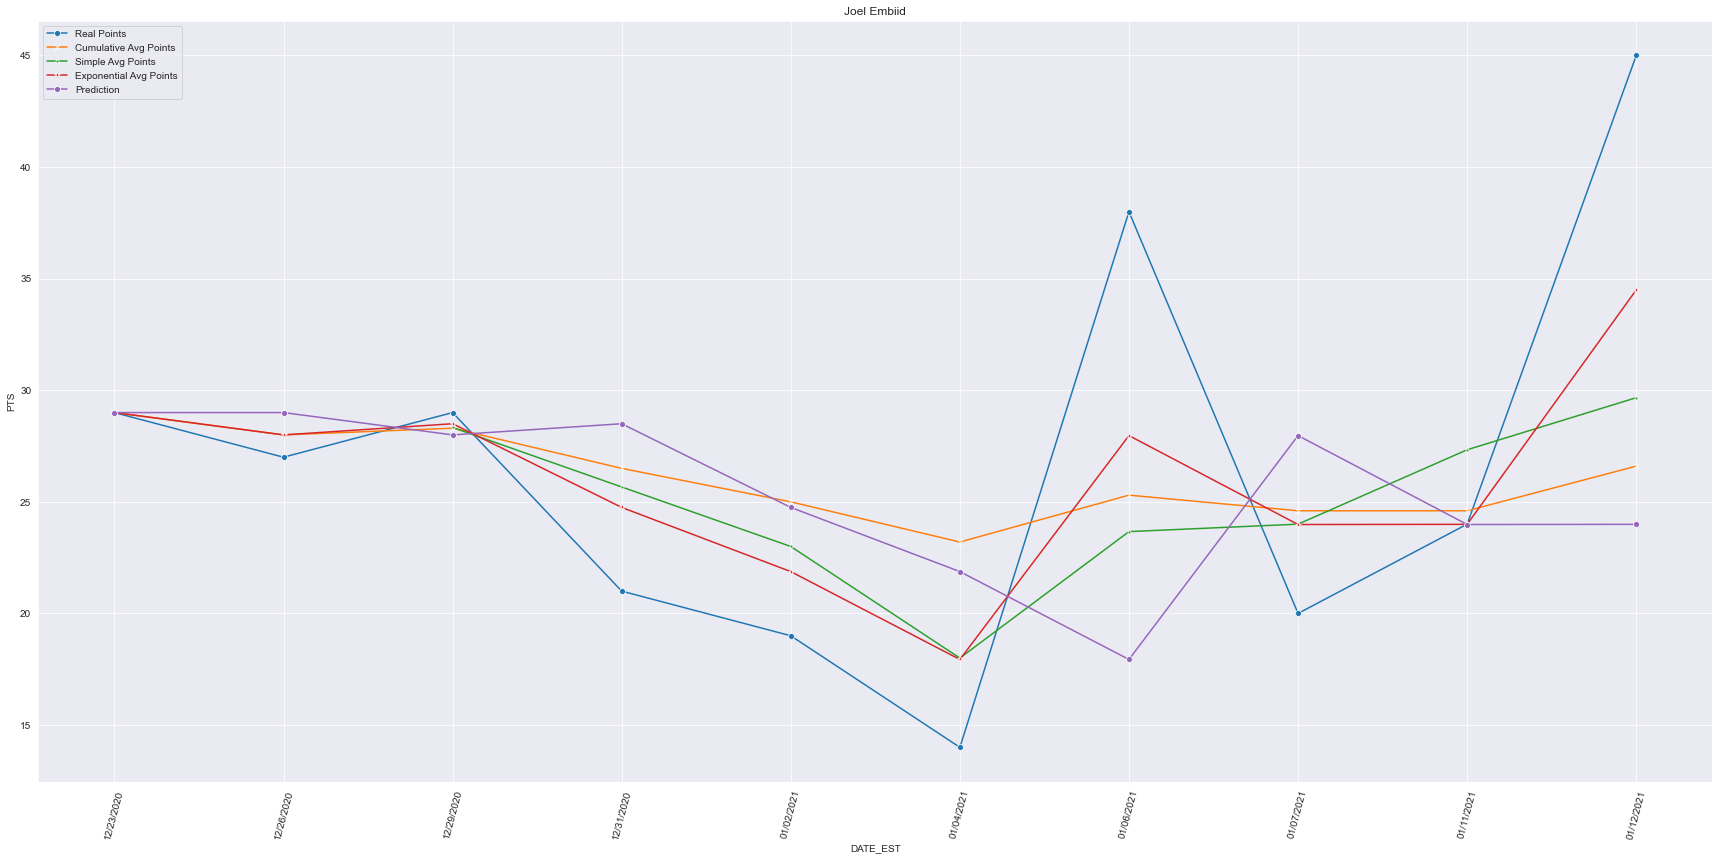

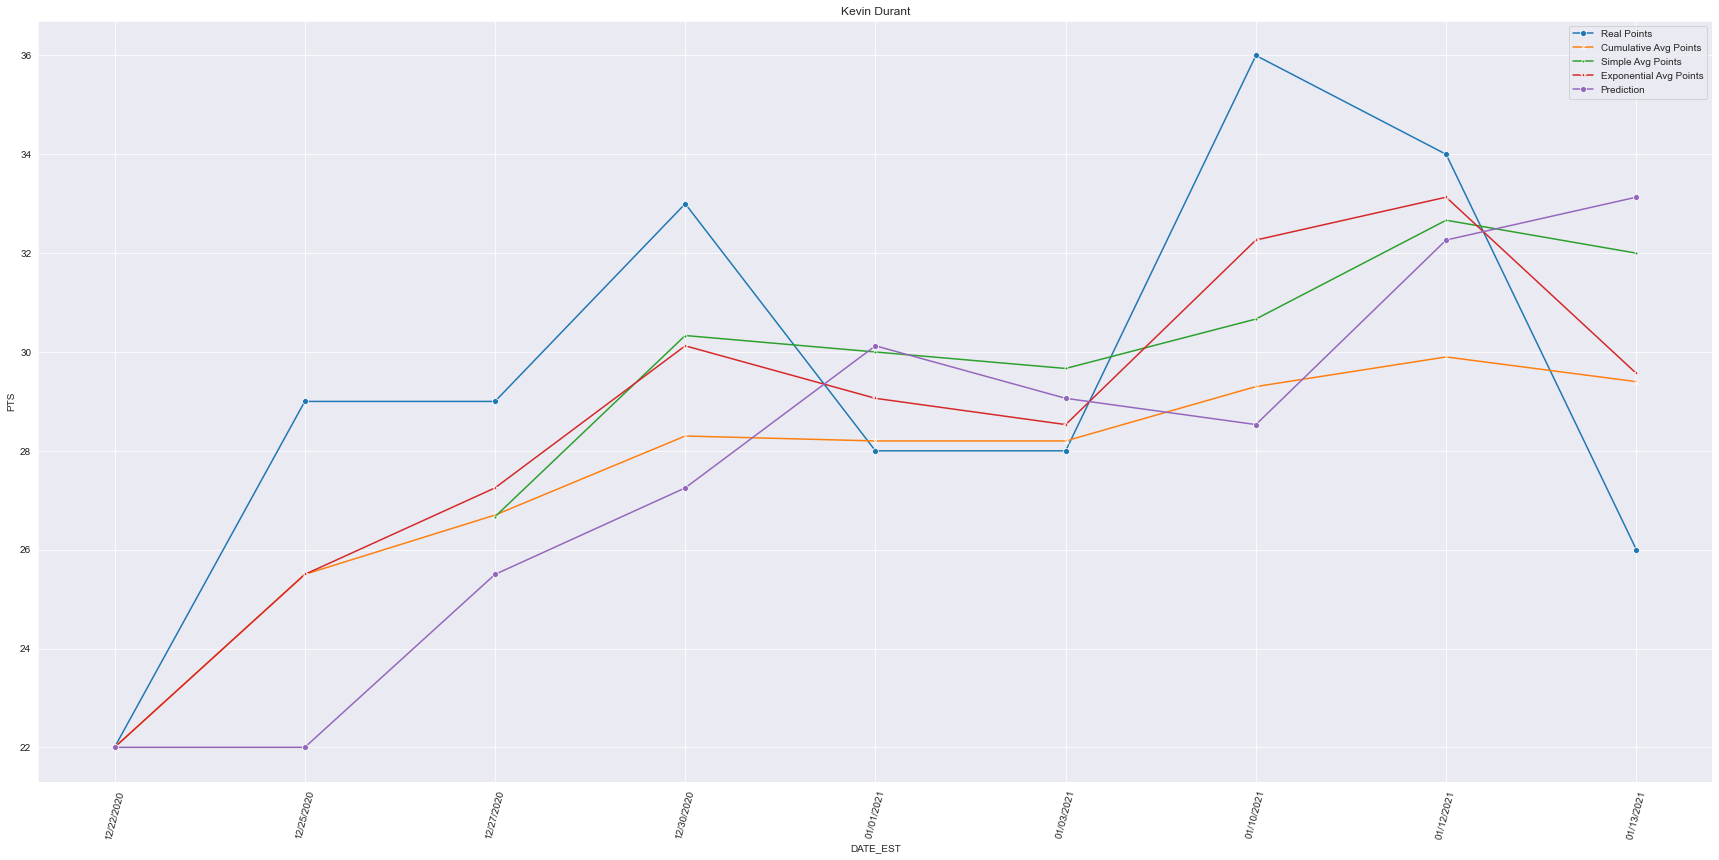

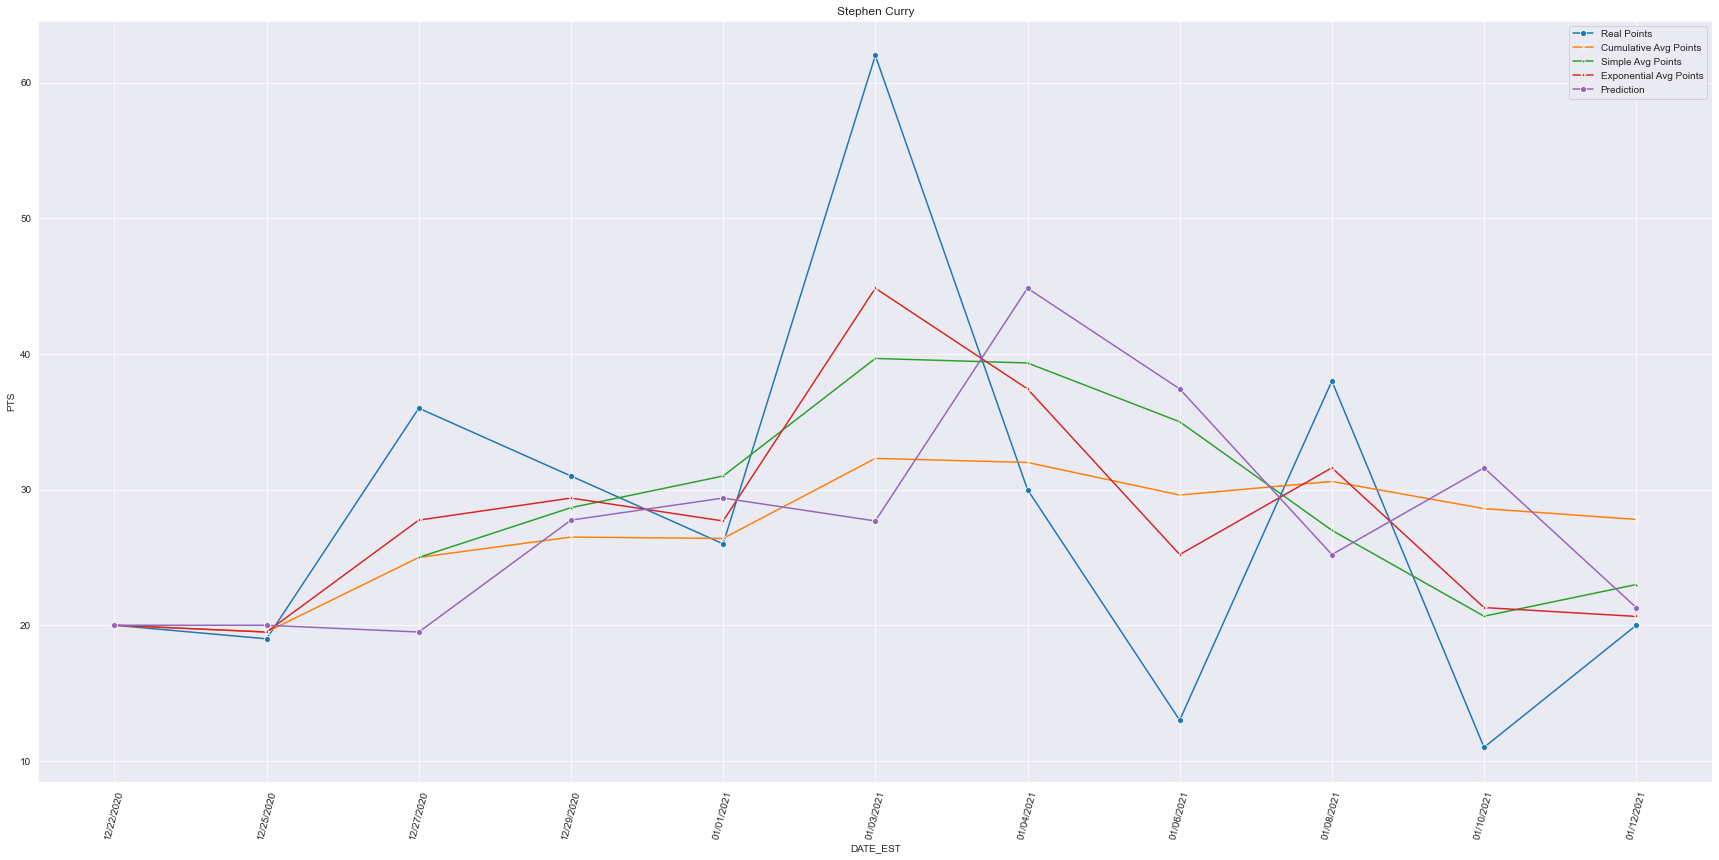

In [3]:
# Find players by full name.
players_of_interest = ['LeBron James', 'Anthony Davis', 'James Harden', 'Bradley Beal', 'Russell Westbrook', 'Devin Booker', 'Luka Doncic', 'Joel Embiid', 'Kevin Durant', 'Stephen Curry']

for pl in players_of_interest:
    player = players.find_players_by_full_name(pl)[0]
    print(player)
    
    gamesdata = cumestatsplayergames.CumeStatsPlayerGames(player_id=player['id'])
    games = gamesdata.get_data_frames()[0]
    game_ids = games['GAME_ID'].str.cat(sep='|')
    
    data = cumestatsplayer.CumeStatsPlayer(game_ids = game_ids , player_id=player['id'])
    player_games = data.get_data_frames()[0]
    
    player_games['SMA'] = player_games.iloc[:,-2].rolling(window=3).mean()
    player_games['EMA'] = player_games.iloc[:,-3].ewm(span=3, adjust=False).mean()
    
    player_games['PREDICTION'] = player_games['EMA']
    player_games.loc[1:, ['PREDICTION']] = player_games['EMA'].iloc[:-1,].to_list()
    
    sns.set_style('darkgrid')
    
    plt.figure(figsize=(30,14))
    plt.title(player['full_name'])
    plt.xticks(rotation=75)
    sns.lineplot(data=player_games, x='DATE_EST', y='PTS', label='Real Points', marker='o')
    sns.lineplot(data=player_games, x='DATE_EST', y='AVG_PTS', label='Cumulative Avg Points', marker='x')
    sns.lineplot(data=player_games, x='DATE_EST', y='SMA', label='Simple Avg Points', marker='.')
    sns.lineplot(data=player_games, x='DATE_EST', y='EMA', label='Exponential Avg Points', marker='*')
    sns.lineplot(data=player_games, x='DATE_EST', y='PREDICTION', label='Prediction', marker='o')
    
    

In [29]:
# Anthony Davis Games
gamesdata = cumestatsplayergames.CumeStatsPlayerGames(player_id='203076', season='2019-20')
games = gamesdata.get_data_frames()[0]

In [31]:
games.head()
game_ids = games['GAME_ID'].str.cat(sep='|')

In [32]:
game_ids

'0021901296|0021901282|0021901273|0021901265|0021901255|0021901243|0021901232|0021900968|0021900948|0021900939|0021900915|0021900891|0021900876|0021900861|0021900842|0021900833|0021900817|0021900801|0021900783|0021900768|0021900754|0021900736|0021900726|0021900684|0021900667|0021900659|0021900648|0021900553|0021900538|0021900522|0021900507|0021900490|0021900484|0021900458|0021900443|0021900417|0021900390|0021900374|0021900358|0021900342|0021900329|0021900314|0021900304|0021900287|0021900279|0021900264|0021900249|0021900232|0021900220|0021900201|0021900188|0021900174|0021900151|0021900139|0021900126|0021900100|0021900088|0021900074|0021900054|0021900040|0021900025|0021900002'

In [34]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

In [71]:
data = cumestatsplayer.CumeStatsPlayer(game_ids = game_ids , player_id='203076')
player_games = data.get_data_frames()[0]

In [64]:
player_games.head()

,DATE_EST,VISITOR_TEAM,HOME_TEAM,GP,GS,ACTUAL_MINUTES,ACTUAL_SECONDS,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,FTA,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AVG_TOT_REB,AST,PF,DQ,STL,TURNOVERS,BLK,PTS,AVG_PTS
0,10/22/2019,Lakers,Clippers,1,1,37,21,8,21,0.381,0,2,0.0,9,14,0.643,3,6,9,9.0,5,3,0,1,3,2,25,25.0
1,10/25/2019,Jazz,Lakers,1,1,32,20,7,17,0.412,0,2,0.0,7,7,1.000,0,7,7,8.0,2,4,0,2,3,5,21,23.0
2,10/27/2019,Hornets,Lakers,1,1,32,29,10,19,0.526,3,5,0.6,6,6,1.000,2,12,14,10.0,3,3,0,1,5,3,29,25.0
3,10/29/2019,Grizzlies,Lakers,1,1,30,34,7,17,0.412,0,2,0.0,26,27,0.963,8,12,20,12.5,2,2,0,0,0,2,40,28.8
4,11/01/2019,Lakers,Mavericks,1,1,42,39,15,28,0.536,0,5,0.0,1,2,0.500,2,6,8,11.6,2,1,0,2,1,2,31,29.2


In [72]:
player_games['SMA'] = player_games.iloc[:,-2].rolling(window=3).mean()

In [74]:
player_games['EMA'] = player_games.iloc[:,-3].ewm(span=3, adjust=False).mean()

In [75]:
player_games.head(10)

,DATE_EST,VISITOR_TEAM,HOME_TEAM,GP,GS,ACTUAL_MINUTES,ACTUAL_SECONDS,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,FTA,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AVG_TOT_REB,AST,PF,DQ,STL,TURNOVERS,BLK,PTS,AVG_PTS,SMA,EMA
0,10/22/2019,Lakers,Clippers,1,1,37,21,8,21,0.381,0,2,0.0,9,14,0.643,3,6,9,9.0,5,3,0,1,3,2,25,25.0,NaN,25.00000
1,10/25/2019,Jazz,Lakers,1,1,32,20,7,17,0.412,0,2,0.0,7,7,1.000,0,7,7,8.0,2,4,0,2,3,5,21,23.0,NaN,23.00000
2,10/27/2019,Hornets,Lakers,1,1,32,29,10,19,0.526,3,5,0.6,6,6,1.000,2,12,14,10.0,3,3,0,1,5,3,29,25.0,25.000000,26.00000
3,10/29/2019,Grizzlies,Lakers,1,1,30,34,7,17,0.412,0,2,0.0,26,27,0.963,8,12,20,12.5,2,2,0,0,0,2,40,28.8,30.000000,33.00000
4,11/01/2019,Lakers,Mavericks,1,1,42,39,15,28,0.536,0,5,0.0,1,2,0.500,2,6,8,11.6,2,1,0,2,1,2,31,29.2,33.333333,32.00000
5,11/03/2019,Lakers,Spurs,1,1,36,0,10,20,0.500,1,2,0.5,4,4,1.000,2,9,11,11.5,2,2,0,0,6,4,25,28.5,32.000000,28.50000
6,11/05/2019,Lakers,Bulls,1,1,31,25,6,15,0.400,1,2,0.5,2,2,1.000,3,4,7,10.9,3,4,0,1,3,3,15,26.6,23.666667,21.75000
7,11/08/2019,Heat,Lakers,1,1,34,44,11,17,0.647,0,0,0.0,4,4,1.000,2,6,8,10.5,7,4,0,2,2,3,26,26.5,22.000000,23.87500
8,11/10/2019,Raptors,Lakers,1,1,37,40,10,20,0.500,2,5,0.4,5,6,0.833,3,5,8,10.2,3,3,0,2,5,4,27,26.6,22.666667,25.43750
9,11/12/2019,Lakers,Suns,1,1,37,32,9,17,0.529,1,2,0.5,5,6,0.833,3,9,12,10.4,4,1,0,2,1,1,24,26.3,25.666667,24.71875


<AxesSubplot:xlabel='DATE_EST', ylabel='PTS'>

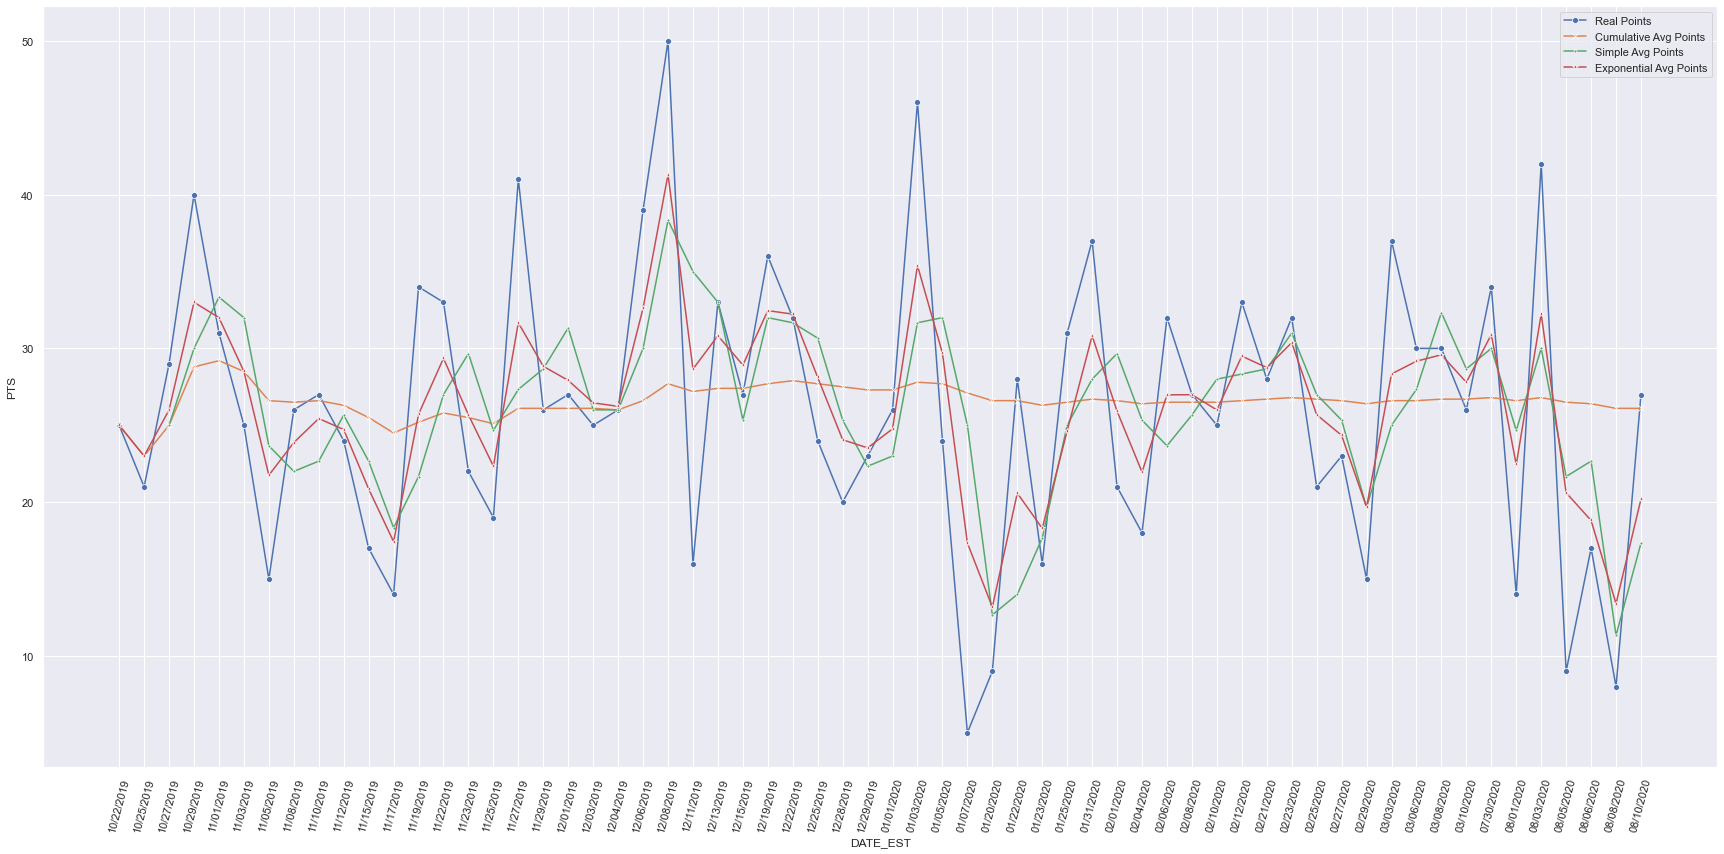

In [91]:
plt.figure(figsize=(30,14))
plt.xticks(rotation=75)
sns.set_style('darkgrid')
sns.lineplot(data=player_games, x='DATE_EST', y='PTS', label='Real Points', marker='o')
sns.lineplot(data=player_games, x='DATE_EST', y='AVG_PTS', label='Cumulative Avg Points', marker='x')
sns.lineplot(data=player_games, x='DATE_EST', y='SMA', label='Simple Avg Points', marker='.')
sns.lineplot(data=player_games, x='DATE_EST', y='EMA', label='Exponential Avg Points', marker='*')

In [92]:
player_games

,DATE_EST,VISITOR_TEAM,HOME_TEAM,GP,GS,ACTUAL_MINUTES,ACTUAL_SECONDS,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,FTA,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AVG_TOT_REB,AST,PF,DQ,STL,TURNOVERS,BLK,PTS,AVG_PTS,SMA,EMA
0,10/22/2019,Lakers,Clippers,1,1,37,21,8,21,0.381,0,2,0.000,9,14,0.643,3,6,9,9.0,5,3,0,1,3,2,25,25.0,NaN,25.000000
1,10/25/2019,Jazz,Lakers,1,1,32,20,7,17,0.412,0,2,0.000,7,7,1.000,0,7,7,8.0,2,4,0,2,3,5,21,23.0,NaN,23.000000
2,10/27/2019,Hornets,Lakers,1,1,32,29,10,19,0.526,3,5,0.600,6,6,1.000,2,12,14,10.0,3,3,0,1,5,3,29,25.0,25.000000,26.000000
3,10/29/2019,Grizzlies,Lakers,1,1,30,34,7,17,0.412,0,2,0.000,26,27,0.963,8,12,20,12.5,2,2,0,0,0,2,40,28.8,30.000000,33.000000
4,11/01/2019,Lakers,Mavericks,1,1,42,39,15,28,0.536,0,5,0.000,1,2,0.500,2,6,8,11.6,2,1,0,2,1,2,31,29.2,33.333333,32.000000
5,11/03/2019,Lakers,Spurs,1,1,36,0,10,20,0.500,1,2,0.500,4,4,1.000,2,9,11,11.5,2,2,0,0,6,4,25,28.5,32.000000,28.500000
6,11/05/2019,Lakers,Bulls,1,1,31,25,6,15,0.400,1,2,0.500,2,2,1.000,3,4,7,10.9,3,4,0,1,3,3,15,26.6,23.666667,21.750000
7,11/08/2019,Heat,Lakers,1,1,34,44,11,17,0.647,0,0,0.000,4,4,1.000,2,6,8,10.5,7,4,0,2,2,3,26,26.5,22.000000,23.875000
8,11/10/2019,Raptors,Lakers,1,1,37,40,10,20,0.500,2,5,0.400,5,6,0.833,3,5,8,10.2,3,3,0,2,5,4,27,26.6,22.666667,25.437500
9,11/12/2019,Lakers,Suns,1,1,37,32,9,17,0.529,1,2,0.500,5,6,0.833,3,9,12,10.4,4,1,0,2,1,1,24,26.3,25.666667,24.718750


In [94]:
lamarcusgamesdata = cumestatsplayergames.CumeStatsPlayerGames(player_id='200746')

In [95]:
lamarcusgamesdata.get_data_frames()[0]

,MATCHUP,GAME_ID
0,01/10/2021 Spurs at Timberwolves,0022000147
1,01/09/2021 Spurs at Timberwolves,0022000138
2,01/07/2021 Spurs at Lakers,0022000121
3,01/05/2021 Spurs at Clippers,0022000105
4,12/27/2020 Spurs at Pelicans,0022000034
5,12/26/2020 Raptors at Spurs,0022000027
6,12/23/2020 Spurs at Grizzlies,0022000017


In [96]:
# Lamarcus Aldridge Games
lamarcusgamesdata = cumestatsplayergames.CumeStatsPlayerGames(player_id='200746')
lamarcusgames = lamarcusgamesdata.get_data_frames()[0]
lamarcusgame_ids = lamarcusgames['GAME_ID'].str.cat(sep='|')

lamarcusdata = cumestatsplayer.CumeStatsPlayer(game_ids = lamarcusgame_ids , player_id='200746')
lamarcusgames = lamarcusdata.get_data_frames()[0]


lamarcusgames['SMA'] = lamarcusgames.iloc[:,-2].rolling(window=3).mean()
lamarcusgames['EMA'] = lamarcusgames.iloc[:,-3].ewm(span=3, adjust=False).mean()

In [108]:
lamarcusgames['COEFFS'] = [18,18,17,15,15,17,18]

In [109]:
lamarcusgames

,DATE_EST,VISITOR_TEAM,HOME_TEAM,GP,GS,ACTUAL_MINUTES,ACTUAL_SECONDS,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,FTA,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AVG_TOT_REB,AST,PF,DQ,STL,TURNOVERS,BLK,PTS,AVG_PTS,SMA,EMA,COEFFS
0,12/23/2020,Spurs,Grizzlies,1,1,28,46,9,17,0.529,1,4,0.250,1,1,1.0,0,3,3,3.0,1,3,0,0,2,1,20,20.0,NaN,20.0,18
1,12/26/2020,Raptors,Spurs,1,1,28,43,5,14,0.357,1,5,0.200,1,2,0.5,1,5,6,4.5,4,2,0,0,0,1,12,16.0,NaN,16.0,18
2,12/27/2020,Spurs,Pelicans,1,1,20,15,2,7,0.286,0,2,0.000,0,0,0.0,1,3,4,4.3,1,3,0,0,2,2,4,12.0,12.000000,10.0,17
3,01/05/2021,Spurs,Clippers,1,1,25,14,6,16,0.375,2,6,0.333,0,0,0.0,2,4,6,4.8,2,0,0,1,1,0,14,12.5,10.000000,12.0,15
4,01/07/2021,Spurs,Lakers,1,1,31,20,11,18,0.611,3,7,0.429,3,3,1.0,0,5,5,4.8,3,1,0,0,1,0,28,15.6,15.333333,20.0,15
5,01/09/2021,Spurs,Timberwolves,1,1,32,46,4,11,0.364,1,3,0.333,1,2,0.5,1,2,3,4.5,1,4,0,2,0,1,10,14.7,17.333333,15.0,17
6,01/10/2021,Spurs,Timberwolves,1,1,36,43,9,21,0.429,1,3,0.333,1,1,1.0,2,7,9,5.1,4,2,0,1,2,0,20,15.4,19.333333,17.5,18


<AxesSubplot:xlabel='DATE_EST', ylabel='PTS'>

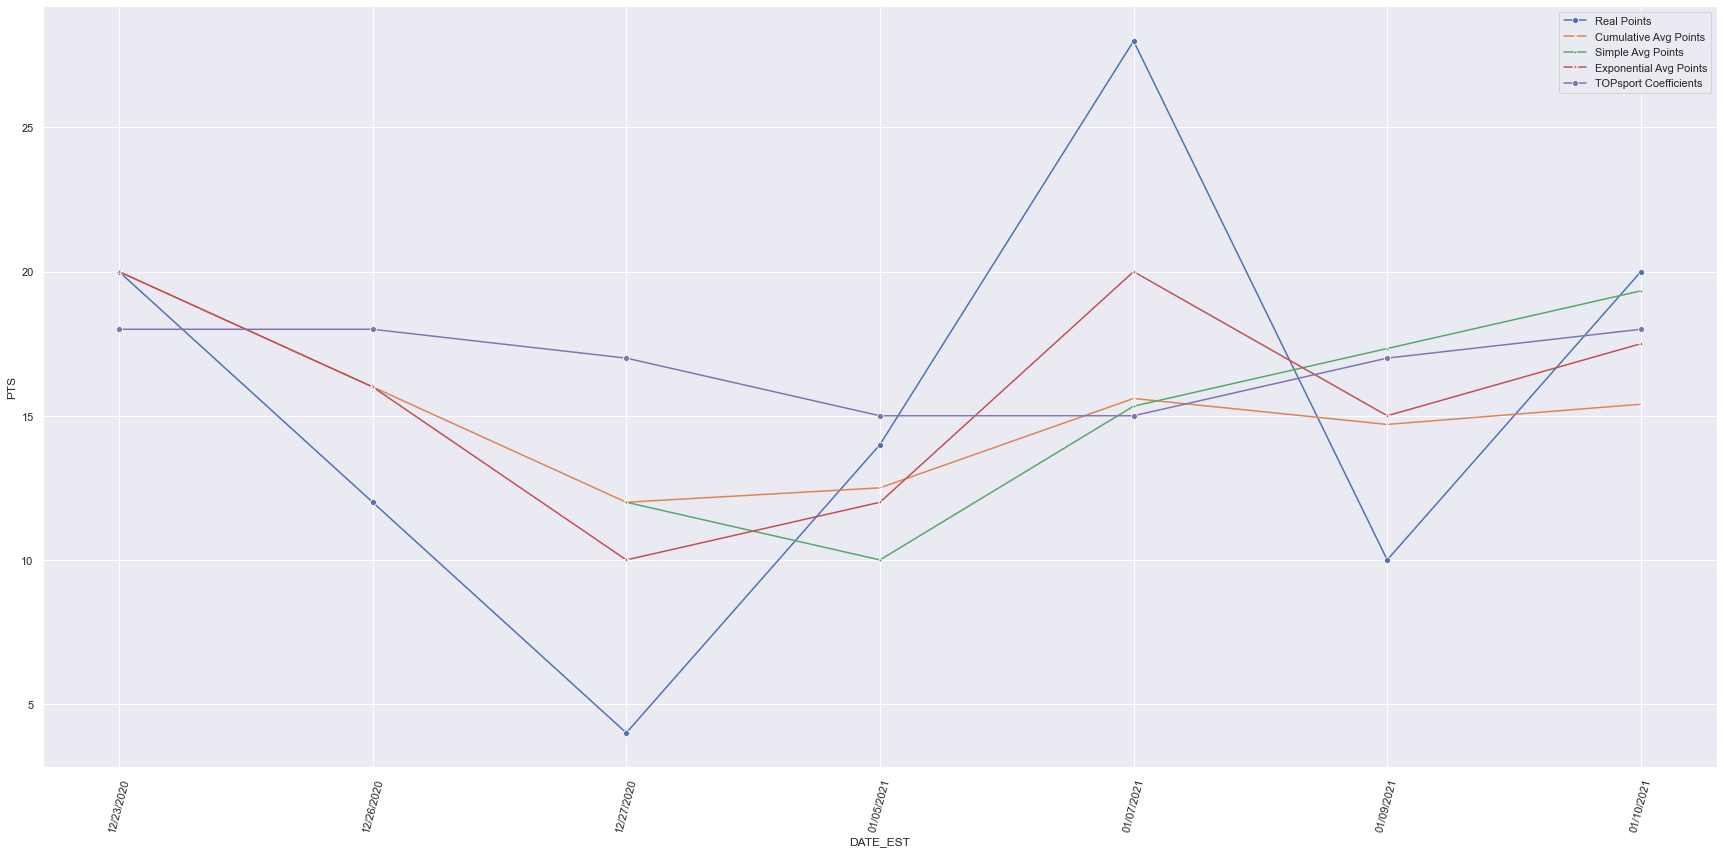

In [110]:
plt.figure(figsize=(30,14))
plt.xticks(rotation=75)
sns.set_style('darkgrid')
sns.lineplot(data=lamarcusgames, x='DATE_EST', y='PTS', label='Real Points', marker='o')
sns.lineplot(data=lamarcusgames, x='DATE_EST', y='AVG_PTS', label='Cumulative Avg Points', marker='x')
sns.lineplot(data=lamarcusgames, x='DATE_EST', y='SMA', label='Simple Avg Points', marker='.')
sns.lineplot(data=lamarcusgames, x='DATE_EST', y='EMA', label='Exponential Avg Points', marker='*')
sns.lineplot(data=lamarcusgames, x='DATE_EST', y='COEFFS', label='TOPsport Coefficients', marker='o')

In [145]:

# Lamarcus Aldridge Games
alexandergamesdata = cumestatsplayergames.CumeStatsPlayerGames(player_id='1628983')
alexandergames = alexandergamesdata.get_data_frames()[0]
alexandergame_ids = alexandergames['GAME_ID'].str.cat(sep='|')

alexanderdata = cumestatsplayer.CumeStatsPlayer(game_ids = alexandergame_ids , player_id='1628983')
alexandergames = alexanderdata.get_data_frames()[0]


alexandergames['SMA'] = alexandergames.iloc[:,-2].rolling(window=3).mean()
alexandergames['EMA'] = alexandergames.iloc[:,-3].ewm(span=3, adjust=False).mean()

In [146]:
alexandergames['COEFFS'] = [22,21,20,23,20,20,20,20,20]

In [147]:
alexandergames

,DATE_EST,VISITOR_TEAM,HOME_TEAM,GP,GS,ACTUAL_MINUTES,ACTUAL_SECONDS,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,FTA,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AVG_TOT_REB,AST,PF,DQ,STL,TURNOVERS,BLK,PTS,AVG_PTS,SMA,EMA,COEFFS
0,12/26/2020,Thunder,Hornets,1,1,34,22,8,20,0.400,1,6,0.167,7,10,0.700,2,5,7,7.0,9,4,0,0,5,1,24,24.0,NaN,24.000000,22
1,12/28/2020,Jazz,Thunder,1,1,36,25,9,21,0.429,1,7,0.143,4,4,1.000,0,3,3,5.0,7,3,0,1,4,1,23,23.5,NaN,23.500000,21
2,12/29/2020,Magic,Thunder,1,1,33,20,8,10,0.800,3,3,1.000,4,5,0.800,0,7,7,5.7,7,1,0,0,5,0,23,23.3,23.333333,23.250000,20
3,12/31/2020,Pelicans,Thunder,1,1,28,29,3,10,0.300,2,6,0.333,0,2,0.000,1,3,4,5.3,4,2,0,2,2,0,8,19.5,18.000000,15.625000,23
4,01/02/2021,Thunder,Magic,1,1,34,46,5,17,0.294,2,9,0.222,4,5,0.800,0,4,4,5.0,7,3,0,0,1,1,16,18.8,15.666667,15.812500,20
5,01/04/2021,Thunder,Heat,1,1,27,51,7,15,0.467,2,6,0.333,2,2,1.000,0,2,2,4.5,4,2,0,0,2,0,18,18.7,14.000000,16.906250,20
6,01/06/2021,Thunder,Pelicans,1,1,36,31,7,17,0.412,2,7,0.286,5,6,0.833,0,5,5,4.6,9,2,0,5,2,0,21,19.0,18.333333,18.953125,20
7,01/08/2021,Thunder,Knicks,1,1,34,29,9,14,0.643,3,3,1.000,4,6,0.667,4,6,10,5.3,7,2,0,0,3,1,25,19.8,21.333333,21.976562,20
8,01/10/2021,Thunder,Nets,1,1,36,1,11,16,0.688,2,4,0.500,7,8,0.875,1,5,6,5.3,7,3,0,2,2,1,31,21.0,25.666667,26.488281,20


In [148]:
alexandergames['PREDICTION'] = alexandergames['EMA']


In [149]:
alexandergames.loc[1:, ['PREDICTION']]

,PREDICTION
1,23.500000
2,23.250000
3,15.625000
4,15.812500
5,16.906250
6,18.953125
7,21.976562
8,26.488281


In [164]:
alexandergames.loc[1:, ['PREDICTION']] = alexandergames['EMA'].iloc[:-1,].to_list()

In [165]:
alexandergames

,DATE_EST,VISITOR_TEAM,HOME_TEAM,GP,GS,ACTUAL_MINUTES,ACTUAL_SECONDS,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,FTA,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AVG_TOT_REB,AST,PF,DQ,STL,TURNOVERS,BLK,PTS,AVG_PTS,SMA,EMA,COEFFS,PREDICTION
0,12/26/2020,Thunder,Hornets,1,1,34,22,8,20,0.400,1,6,0.167,7,10,0.700,2,5,7,7.0,9,4,0,0,5,1,24,24.0,NaN,24.000000,22,24.000000
1,12/28/2020,Jazz,Thunder,1,1,36,25,9,21,0.429,1,7,0.143,4,4,1.000,0,3,3,5.0,7,3,0,1,4,1,23,23.5,NaN,23.500000,21,24.000000
2,12/29/2020,Magic,Thunder,1,1,33,20,8,10,0.800,3,3,1.000,4,5,0.800,0,7,7,5.7,7,1,0,0,5,0,23,23.3,23.333333,23.250000,20,23.500000
3,12/31/2020,Pelicans,Thunder,1,1,28,29,3,10,0.300,2,6,0.333,0,2,0.000,1,3,4,5.3,4,2,0,2,2,0,8,19.5,18.000000,15.625000,23,23.250000
4,01/02/2021,Thunder,Magic,1,1,34,46,5,17,0.294,2,9,0.222,4,5,0.800,0,4,4,5.0,7,3,0,0,1,1,16,18.8,15.666667,15.812500,20,15.625000
5,01/04/2021,Thunder,Heat,1,1,27,51,7,15,0.467,2,6,0.333,2,2,1.000,0,2,2,4.5,4,2,0,0,2,0,18,18.7,14.000000,16.906250,20,15.812500
6,01/06/2021,Thunder,Pelicans,1,1,36,31,7,17,0.412,2,7,0.286,5,6,0.833,0,5,5,4.6,9,2,0,5,2,0,21,19.0,18.333333,18.953125,20,16.906250
7,01/08/2021,Thunder,Knicks,1,1,34,29,9,14,0.643,3,3,1.000,4,6,0.667,4,6,10,5.3,7,2,0,0,3,1,25,19.8,21.333333,21.976562,20,18.953125
8,01/10/2021,Thunder,Nets,1,1,36,1,11,16,0.688,2,4,0.500,7,8,0.875,1,5,6,5.3,7,3,0,2,2,1,31,21.0,25.666667,26.488281,20,21.976562


<AxesSubplot:xlabel='DATE_EST', ylabel='PTS'>

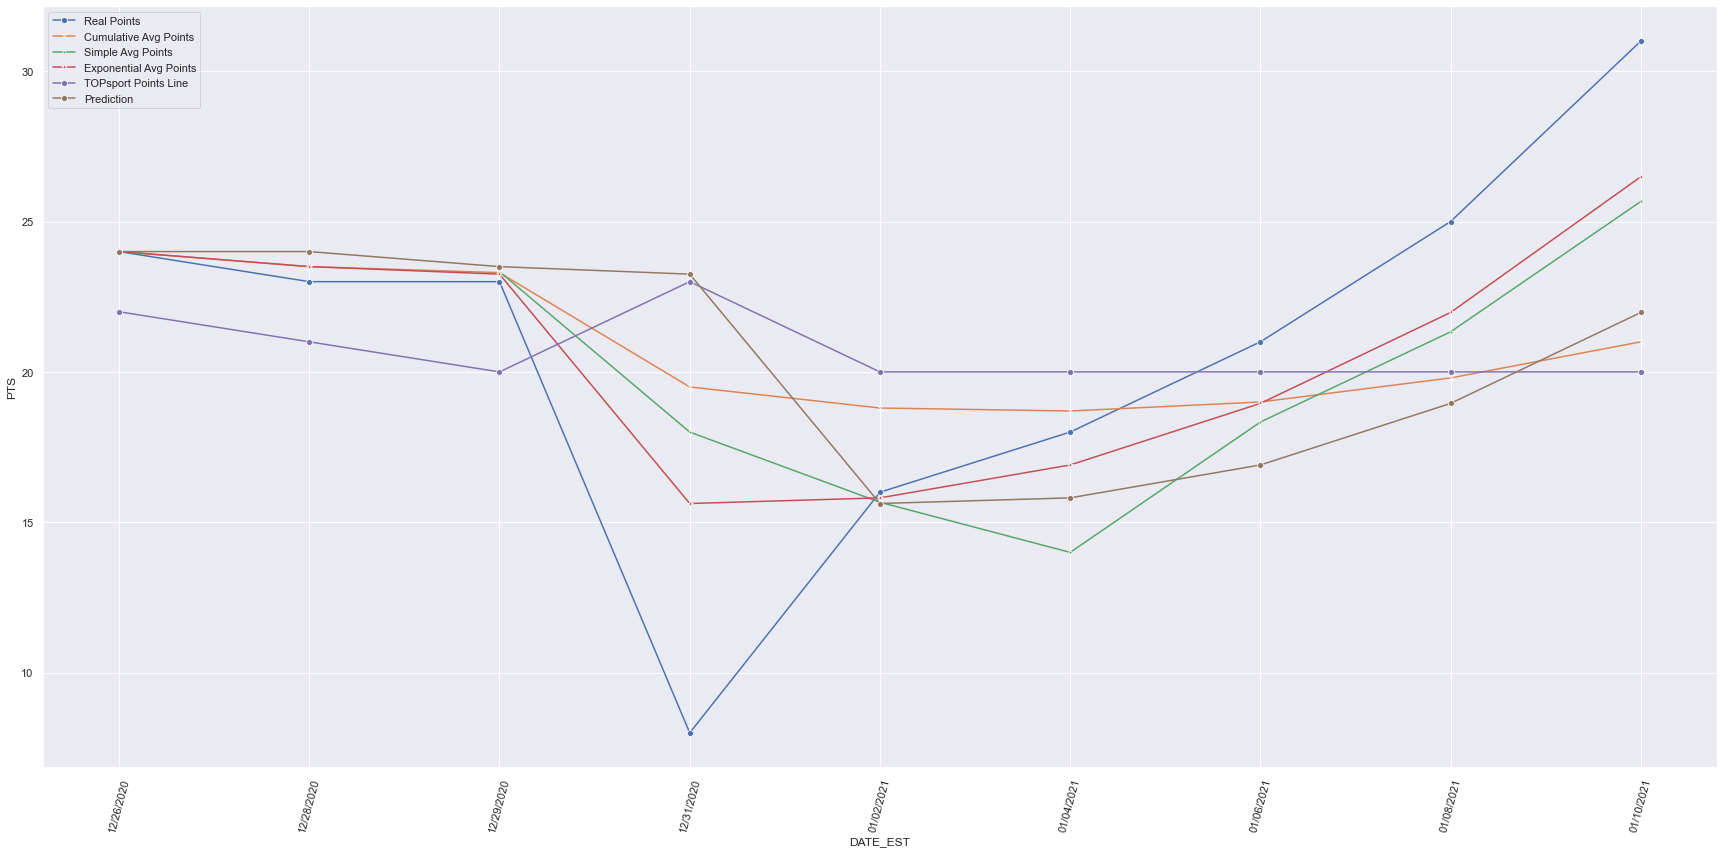

In [167]:
plt.figure(figsize=(30,14))
plt.xticks(rotation=75)
sns.set_style('darkgrid')
sns.lineplot(data=alexandergames, x='DATE_EST', y='PTS', label='Real Points', marker='o')
sns.lineplot(data=alexandergames, x='DATE_EST', y='AVG_PTS', label='Cumulative Avg Points', marker='x')
sns.lineplot(data=alexandergames, x='DATE_EST', y='SMA', label='Simple Avg Points', marker='.')
sns.lineplot(data=alexandergames, x='DATE_EST', y='EMA', label='Exponential Avg Points', marker='*')
sns.lineplot(data=alexandergames, x='DATE_EST', y='COEFFS', label='TOPsport Points Line', marker='o')
sns.lineplot(data=alexandergames, x='DATE_EST', y='PREDICTION', label='Prediction', marker='o')